In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/raw/players_21.csv')

# Show first few rows
df.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [31]:
# Show the first 5 rows of the data
df.head()



,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [32]:
# Check the shape (rows, columns)
print("Shape of dataset:", df.shape)

# Check all column names
print("\nColumn Names:\n", df.columns.tolist())

# Basic info about data types and missing values
print("\nData Types and Non-Null Counts:\n")
df.info()

# Count missing values in each column
print("\nMissing values in each column:\n")
print(df.isnull().sum())


Shape of dataset: (18944, 106)

Column Names:
 ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'moveme

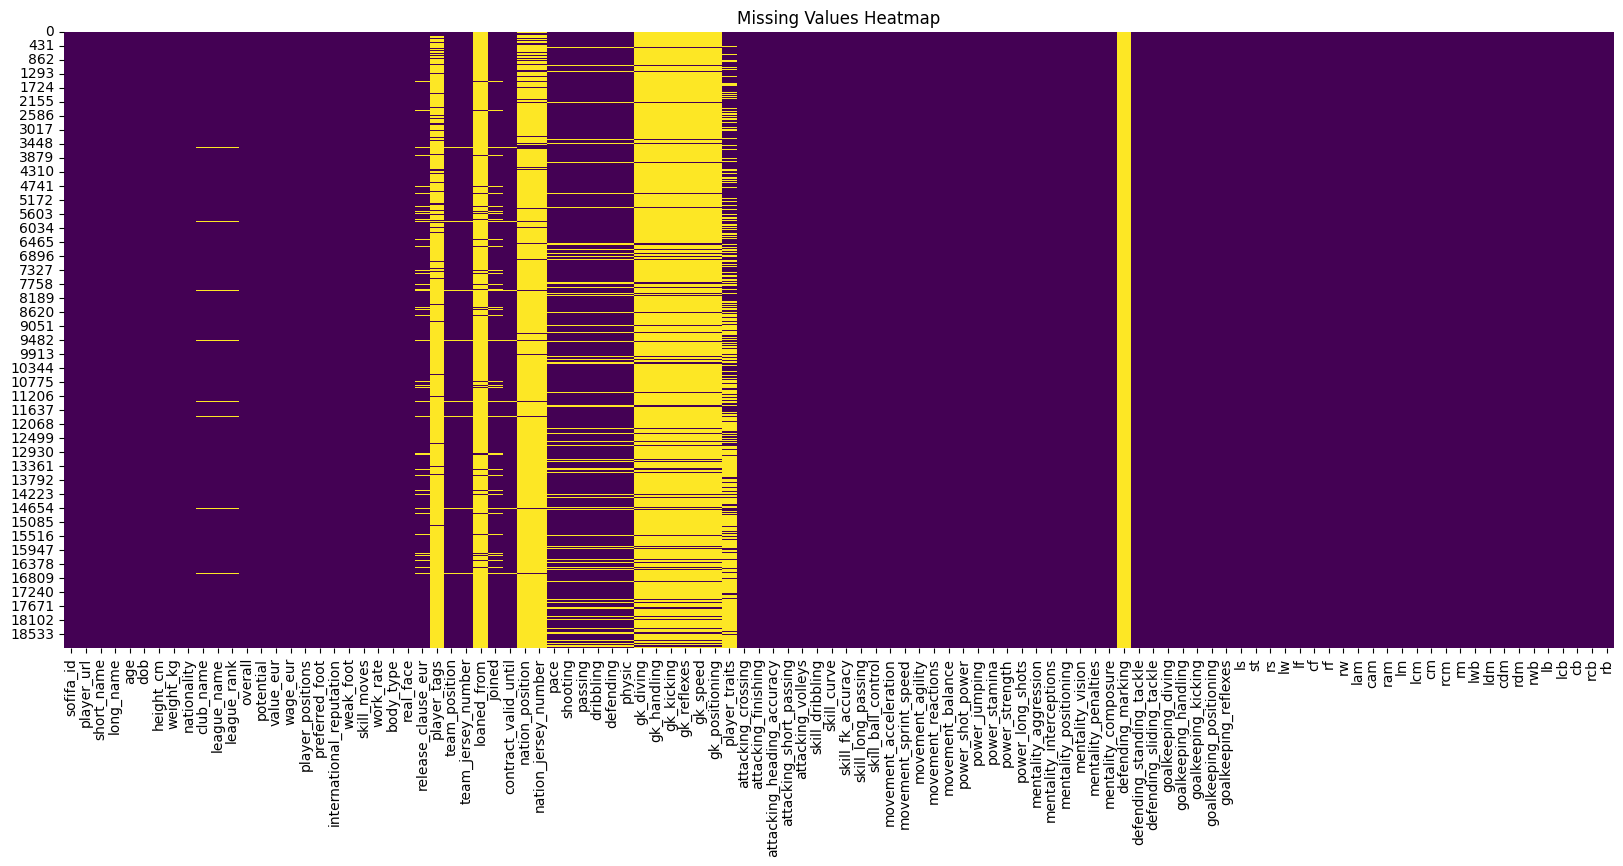

In [33]:
# Visualizing missing values using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [34]:
df = df.drop(columns=['player_traits', 'player_tags', 'nation_position', 'nation_jersey_number', 'loaned_from'])
df['release_clause_eur'] = df['release_clause_eur'].fillna(0)
df['team_jersey_number'] = df['team_jersey_number'].fillna(0)


In [35]:
top_overall = df[['short_name', 'long_name', 'age', 'club_name', 'nationality', 'overall', 'potential', 'value_eur']].sort_values(by='overall', ascending=False).head(10)
top_overall


,short_name,long_name,age,club_name,nationality,overall,potential,value_eur
0,L. Messi,Lionel Andrés Messi Cuccittini,33,FC Barcelona,Argentina,93,93,67500000
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,Juventus,Portugal,92,92,46000000
2,J. Oblak,Jan Oblak,27,Atlético Madrid,Slovenia,91,93,75000000
3,R. Lewandowski,Robert Lewandowski,31,FC Bayern München,Poland,91,91,80000000
4,Neymar Jr,Neymar da Silva Santos Júnior,28,Paris Saint-Germain,Brazil,91,91,90000000
5,K. De Bruyne,Kevin De Bruyne,29,Manchester City,Belgium,91,91,87000000
6,K. Mbappé,Kylian Mbappé Lottin,21,Paris Saint-Germain,France,90,95,105500000
7,M. ter Stegen,Marc-André ter Stegen,28,FC Barcelona,Germany,90,93,69500000
8,V. van Dijk,Virgil van Dijk,28,Liverpool,Netherlands,90,91,75500000
9,Alisson,Alisson Ramsés Becker,27,Liverpool,Brazil,90,91,62500000


C:\Users\Admin\AppData\Local\Temp\ipykernel_3164\3849861813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall, x='overall', y='short_name', palette='viridis')


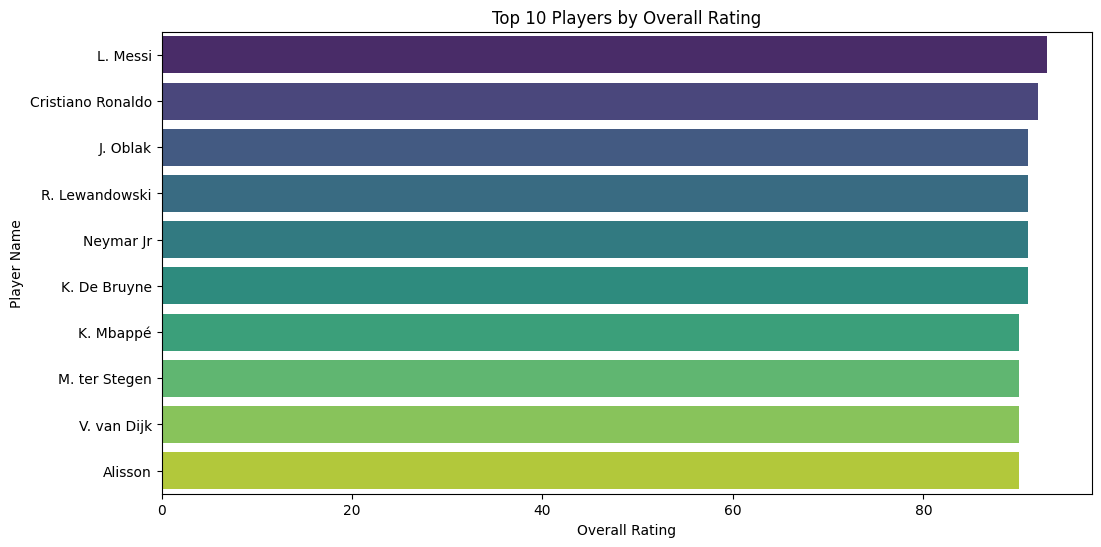

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=top_overall, x='overall', y='short_name', palette='viridis')
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.show()



In [37]:
top_potential = df[['short_name', 'long_name', 'age', 'club_name', 'nationality', 'overall', 'potential', 'value_eur']].sort_values(by='potential', ascending=False).head(10)
top_potential


,short_name,long_name,age,club_name,nationality,overall,potential,value_eur
6,K. Mbappé,Kylian Mbappé Lottin,21,Paris Saint-Germain,France,90,95,105500000
62,K. Havertz,Kai Havertz,21,Chelsea,Germany,85,93,57000000
2,J. Oblak,Jan Oblak,27,Atlético Madrid,Slovenia,91,93,75000000
366,Vinícius Jr.,Vinícius José Paixão de Oliveira Júnior,19,Real Madrid,Brazil,80,93,27500000
28,J. Sancho,Jadon Sancho,20,Borussia Dortmund,England,87,93,69500000
272,João Félix,João Félix Sequeira,20,Atlético Madrid,Portugal,81,93,32000000
7,M. ter Stegen,Marc-André ter Stegen,28,FC Barcelona,Germany,90,93,69500000
0,L. Messi,Lionel Andrés Messi Cuccittini,33,FC Barcelona,Argentina,93,93,67500000
29,T. Alexander-Arnold,Trent Alexander-Arnold,21,Liverpool,England,87,92,60000000
99,E. Haaland,Erling Haaland,19,Borussia Dortmund,Norway,84,92,45000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_3164\3817332683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_potential, x='potential', y='short_name', palette='coolwarm')


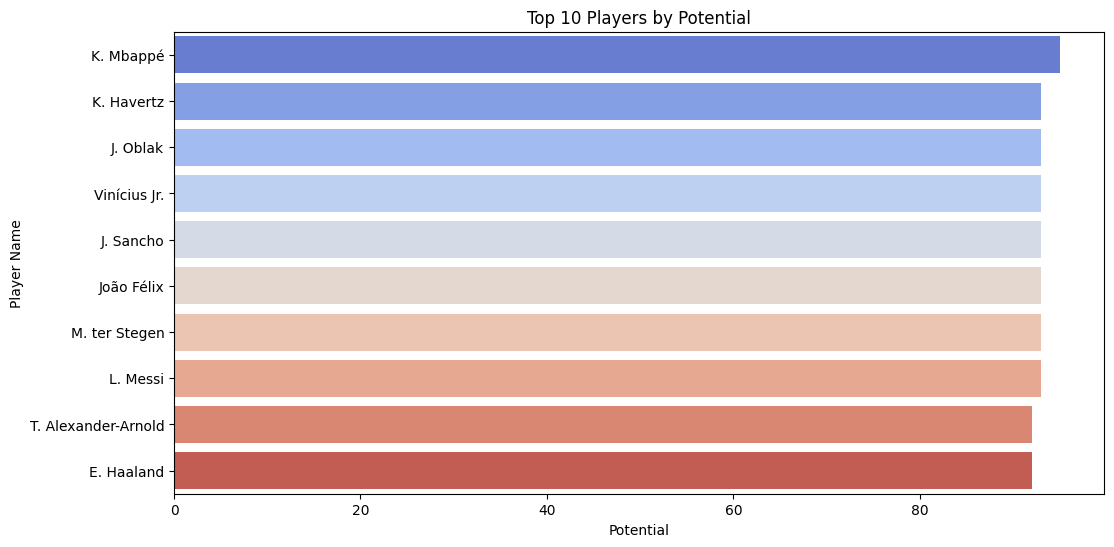

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_potential, x='potential', y='short_name', palette='coolwarm')
plt.title('Top 10 Players by Potential')
plt.xlabel('Potential')
plt.ylabel('Player Name')
plt.show()


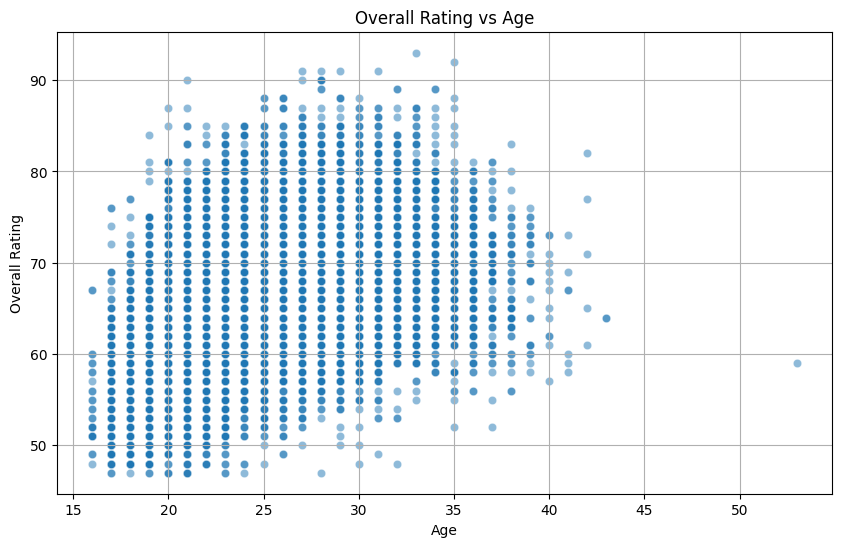

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='overall', alpha=0.5)
plt.title('Overall Rating vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


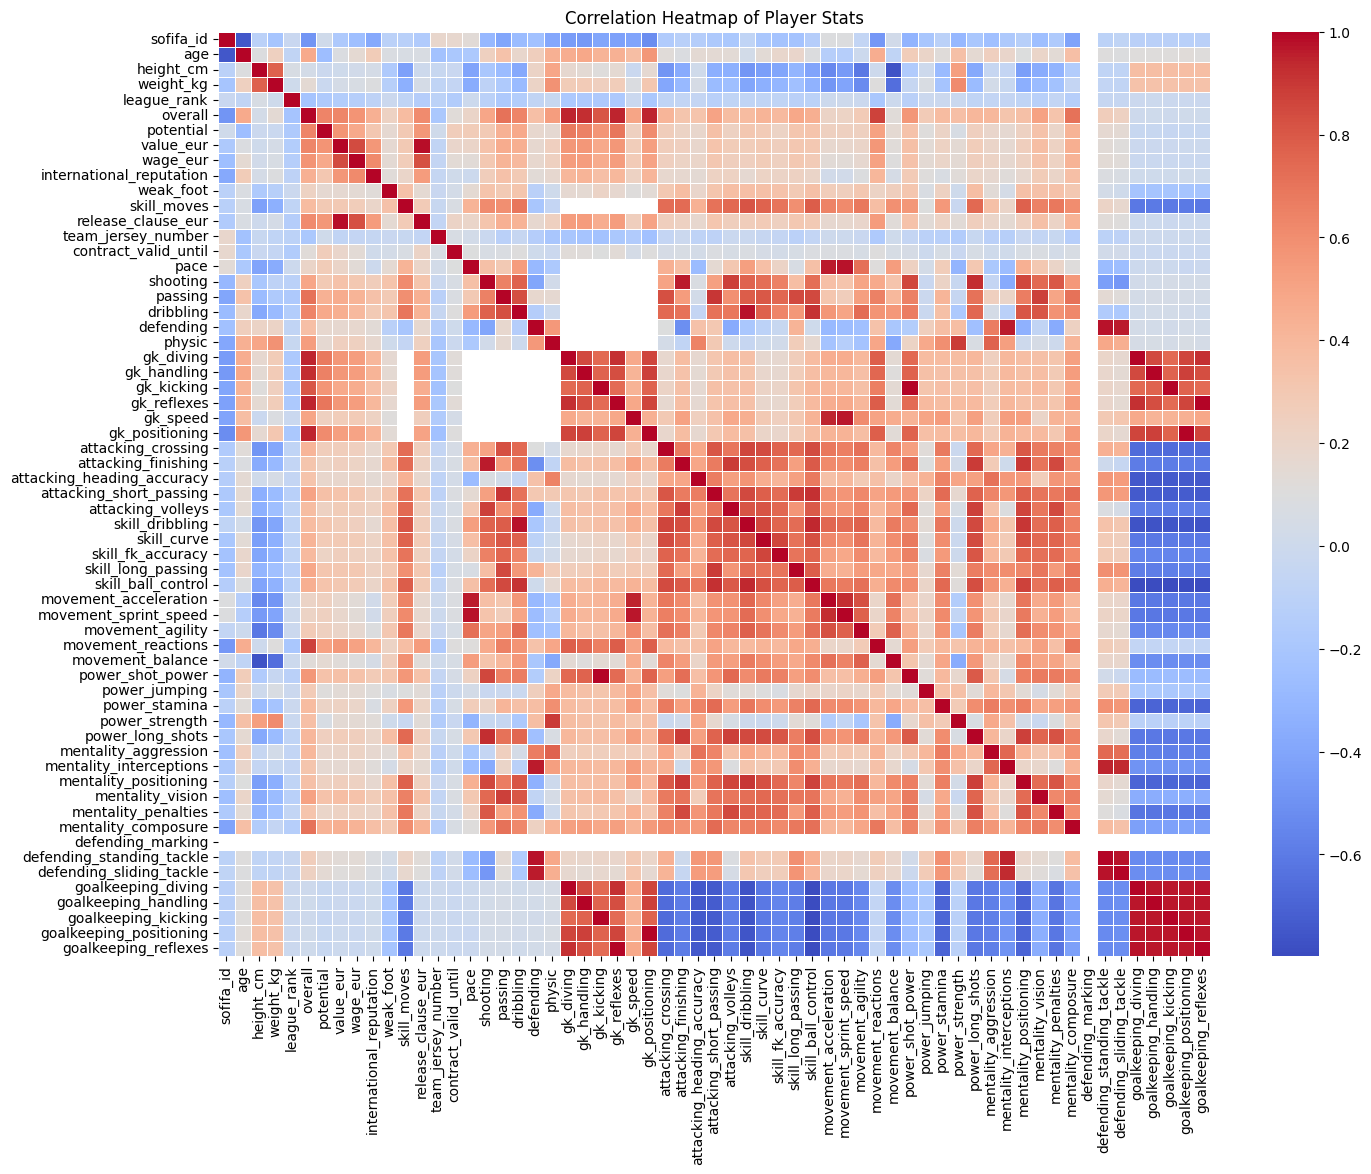

In [40]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Player Stats')
plt.show()


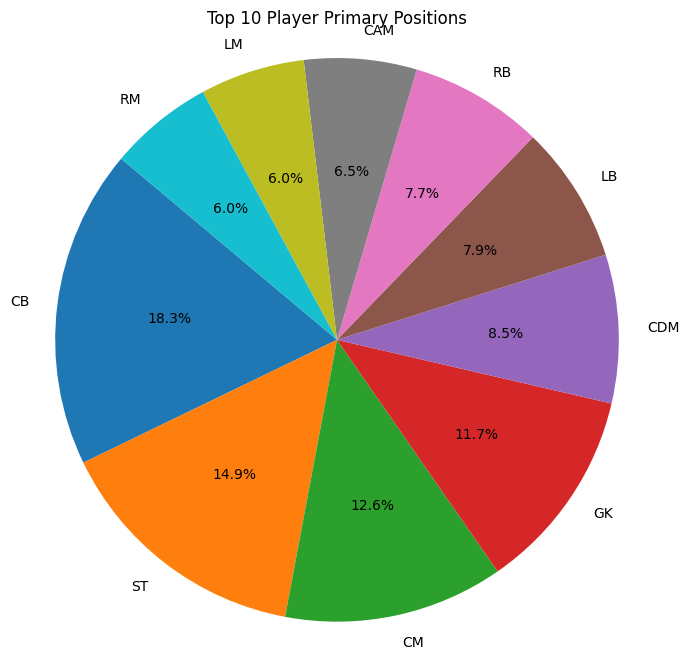

In [41]:
# Count player positions
position_counts = df['player_positions'].str.split(',').str[0].value_counts().head(10)

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Player Primary Positions')
plt.axis('equal')
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_3164\2888382820.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_overall.values, y=club_overall.index, palette='viridis')


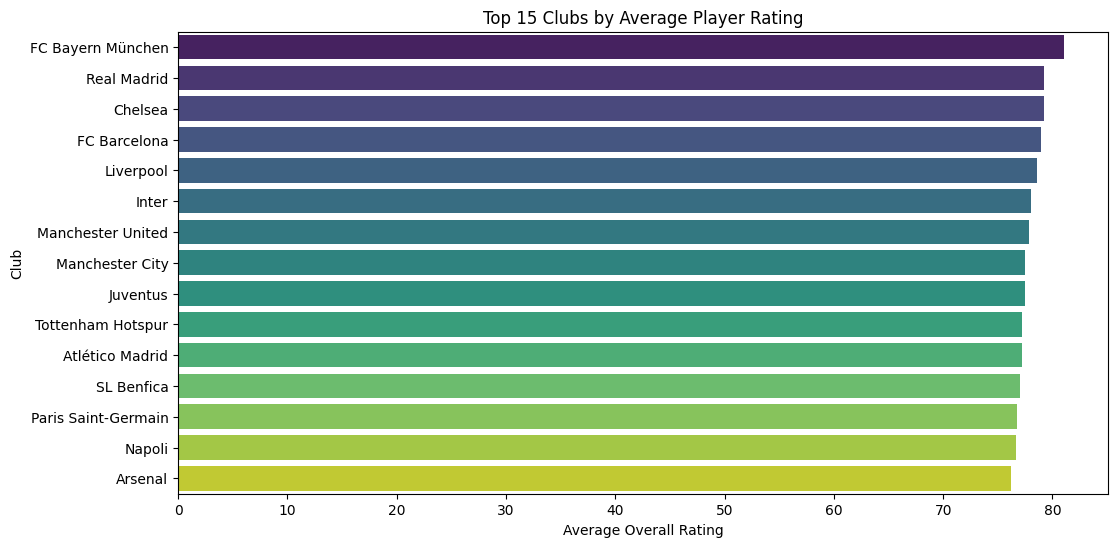

In [42]:
# Group by club and calculate average overall rating
club_overall = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(15)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=club_overall.values, y=club_overall.index, palette='viridis')
plt.xlabel('Average Overall Rating')
plt.ylabel('Club')
plt.title('Top 15 Clubs by Average Player Rating')
plt.show()


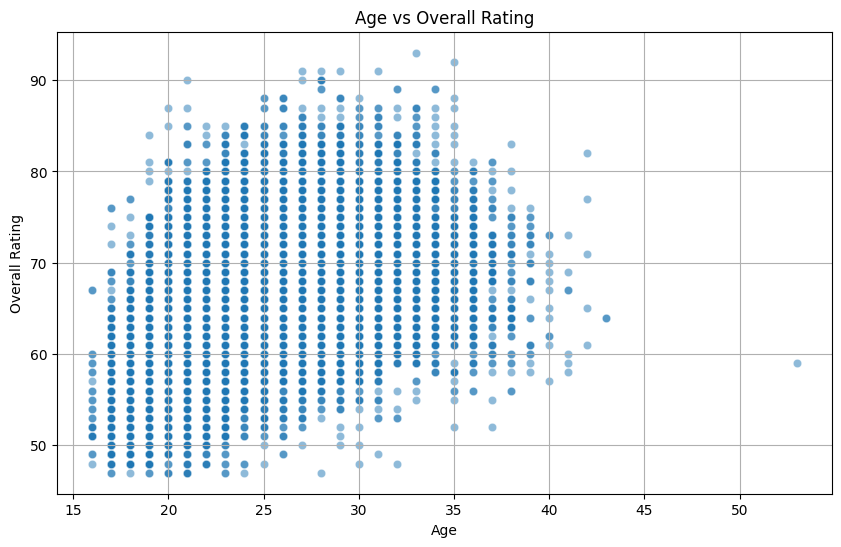

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='overall', alpha=0.5)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


In [44]:
import os
print(os.getcwd())


c:\Users\Admin\Desktop\fifa-player-stats-eda\notebooks


In [45]:
import os

print("Current working directory:", os.getcwd())
print("Does 'visuals' exist?", os.path.exists("visuals"))
print("Is it a directory?", os.path.isdir("visuals"))


Current working directory: c:\Users\Admin\Desktop\fifa-player-stats-eda\notebooks
Does 'visuals' exist? True
Is it a directory? True


In [46]:
os.makedirs("visuals", exist_ok=True)


In [47]:
with open("visuals/test.txt", "w") as f:
    f.write("This is a test.")


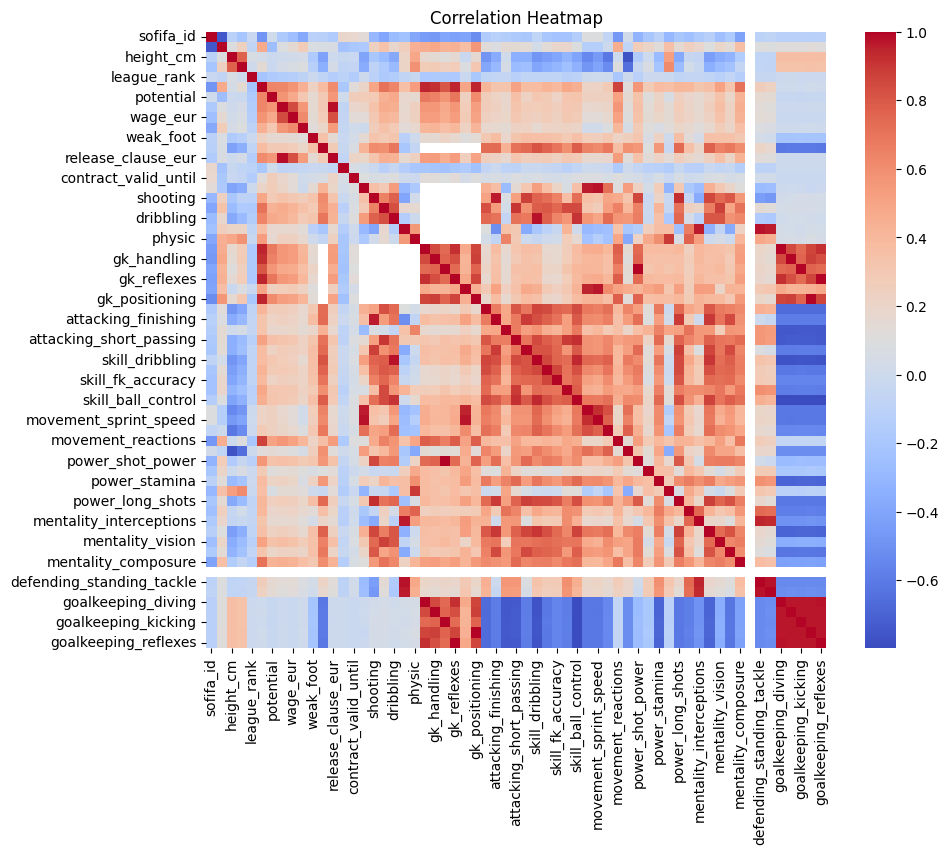

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("visuals/heatmap.png")  # ✅ This should now work
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_3164\3496013985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_players, x='overall', y='short_name', palette='viridis')


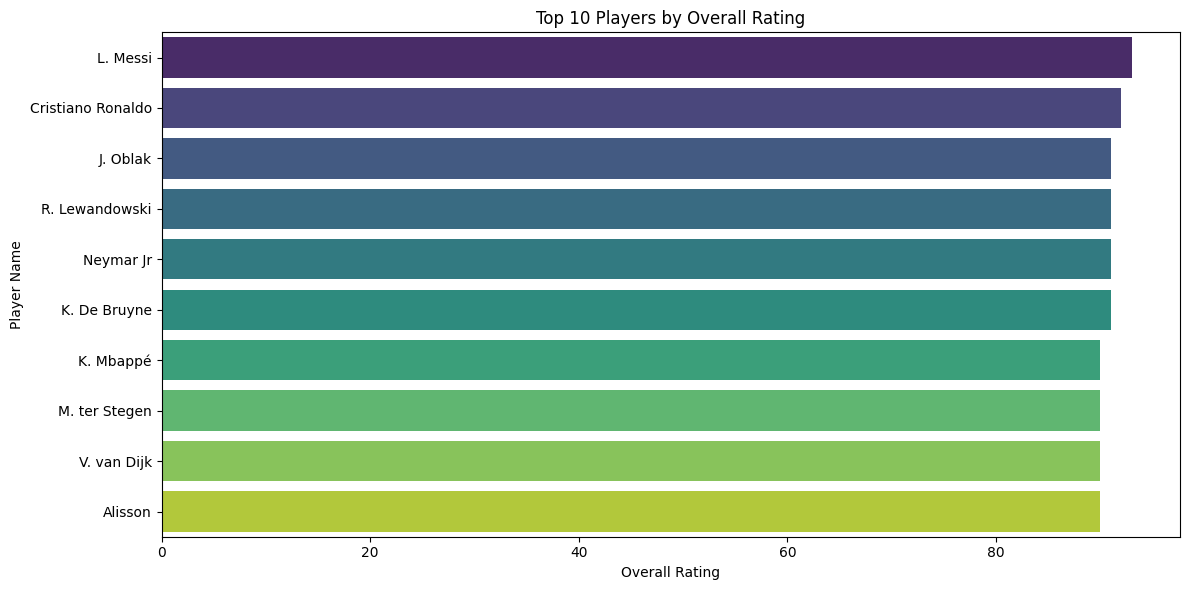

In [49]:
top_10_players = df[['short_name', 'overall']].sort_values(by='overall', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_players, x='overall', y='short_name', palette='viridis')
plt.title('Top 10 Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.tight_layout()
plt.savefig('visuals/top_10_overall.png')
plt.show()


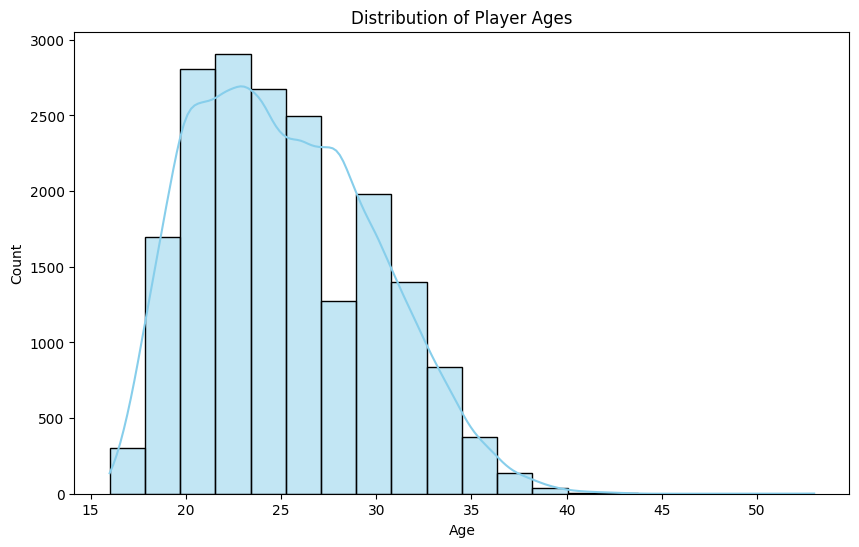

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('visuals/player_age_distribution.png')
plt.show()


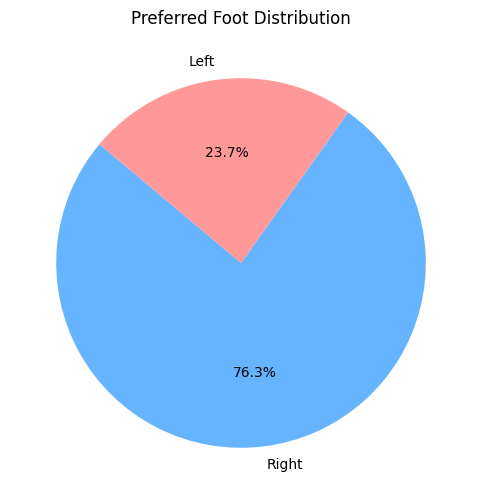

In [51]:
plt.figure(figsize=(6, 6))
df['preferred_foot'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Preferred Foot Distribution')
plt.ylabel('')
plt.savefig('visuals/preferred_foot_pie.png')
plt.show()


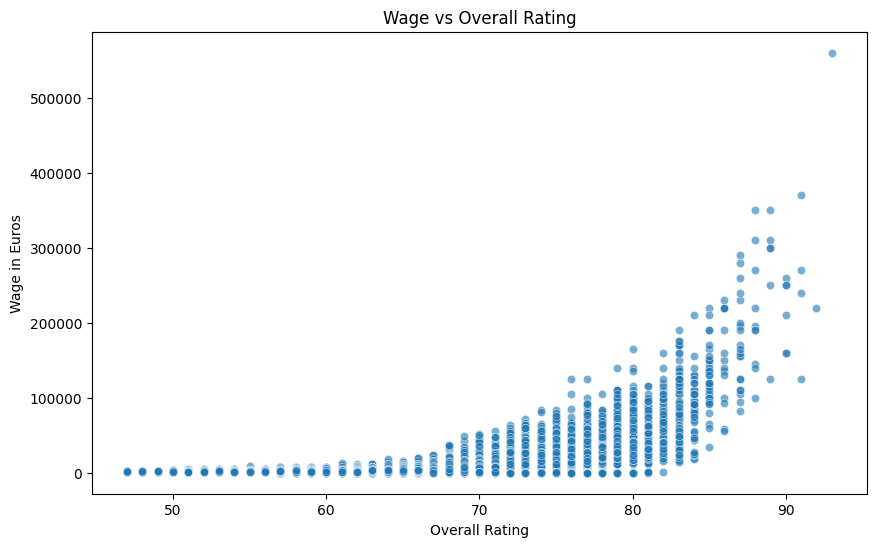

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='overall', y='wage_eur', alpha=0.6)
plt.title('Wage vs Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Wage in Euros')
plt.savefig('visuals/wage_vs_overall.png')
plt.show()
